In [10]:
import pandas as pd
from radiomics import featureextractor

import six, numpy as np
print("done")

done


In [27]:
import os
import SimpleITK as sitk

from radiomics import getTestCase

imagepath_1, labelpath_1 = getTestCase('brain1')
imagepath_2, labelpath_2 = getTestCase('brain2')

image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.title("Brain #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:])
plt.title("Segmentation #1")

plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:], cmap="gray")
plt.title("Brain #2")
plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:])
plt.title("Segmentation #2")

plt.show()

<Figure size 2000x2000 with 4 Axes>

In [13]:
import os

params = os.path.join(os.getcwd(), 'example_settings', 'Params.yaml')

extractor = featureextractor.RadiomicsFeatureExtractor(params)
result_1 = extractor.execute(image_1, label_1)
result_2 = extractor.execute(image_2, label_2)

INFO:radiomics.featureextractor:Loading parameter file C:\Users\steve\OneDrive - University of Adelaide\Python Scripts\MRI_sarcoma_AI\example_settings\Params.yaml
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radio

In [14]:
feature_1 = np.array([])
feature_2 = np.array([])

for key, value in six.iteritems(result_1):
    if key.startswith("original_"):
        feature_1 = np.append(feature_1, result_1[key])
        feature_2 = np.append(feature_2, result_2[key])

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(feature_1)
plt.yscale('log')
plt.title('Features from brain #1')

plt.subplot(3,1,2)
plt.plot(feature_2)
plt.yscale('log')
plt.title("features from brain #2")

plt.subplot(3,1,3)
plt.plot(feature_1 - feature_2)
plt.yscale('log')
plt.title("Difference")

plt.show()

<Figure size 2000x2000 with 3 Axes>

In [22]:
# test opening nii images
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline

image_1 = sitk.ReadImage('./data/STS_001/image.nii.gz')
plt.figure(figsize=(20,20))
plt.subplot(1,1,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.show()

<Figure size 2000x2000 with 1 Axes>

In [1]:
from dcmrtstruct2nii import dcmrtstruct2nii
import SimpleITK as sitk

reader = sitk.ImageSeriesReader()
# test_path = './test'
test_path = 'example_data/manifest-MjbMt99Q1553106146386120388/Soft-tissue-Sarcoma/STS_049/04-14-2002-NA-MRI-UNLISTED AREA-15202/9.000000-Axial FSET2 Fatsat LOWER TIB FIB - RESEARCH-91655'
# test_path = "C:/Users/steve/OneDrive - University of Adelaide/Python Scripts/MRI_sarcoma_AI/example_data/manifest-MjbMt99Q1553106146386120388/Soft-tissue-Sarcoma/STS_049/04-14-2002-NA-MRI-UNLISTED AREA-15202/9.000000-Axial FSET2 Fatsat LOWER TIB FIB - RESEARCH-30537"
#
# struct_path="./example_data/manifest-MjbMt99Q1553106146386120388/Soft-tissue-Sarcoma/STS_049/04-14-2002-NA-MRI-UNLISTED AREA-15202/1.000000-RTstructT2FS-36171/1-1.dcm"
#
# dcmrtstruct2nii(struct_path, test_path, './data1')
dicom_names = reader.GetGDCMSeriesFileNames(test_path)

reader.SetFileNames(dicom_names)

reader.Execute()


Please cite:
Thomas Phil, Thomas Albrecht, Skylar Gay, & Mathis Ersted Rasmussen. (2023). Sikerdebaard/dcmrtstruct2nii: dcmrtstruct2nii v5 (Version v5). Zenodo. https://doi.org/10.5281/zenodo.4037864



<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001AADD7142D0> >

In [24]:
import os
os.path.exists('example_data/manifest-MjbMt99Q1553106146386120388/Soft-tissue-Sarcoma/STS_049/04-14-2002-NA-MRI-UNLISTED AREA-15202/9.000000-Axial FSET2 Fatsat LOWER TIB FIB - RESEARCH-30537')

True

In [3]:
from src.dataset import convert_wiki2nii

convert_wiki2nii("example_data/manifest-MjbMt99Q1553106146386120388/t2stirmetadata.csv",
                 "./example_data/manifest-MjbMt99Q1553106146386120388/",
                 "./data/")

100%|██████████| 51/51 [02:20<00:00,  2.75s/it]


In [28]:
import SimpleITK as sitk
from radiomics import featureextractor

import os

params = os.path.join(os.getcwd(), 'example_settings', 'Params.yaml')

label = sitk.ReadImage("data/STS_001/mask_GTV_Edema.nii.gz")
image = sitk.ReadImage("data/STS_001/image.nii.gz")

extractor = featureextractor.RadiomicsFeatureExtractor(params)
result = extractor.execute(image, label, 255)

INFO:radiomics.featureextractor:Loading parameter file C:\Users\steve\OneDrive - University of Adelaide\Python Scripts\MRI_sarcoma_AI\example_settings\Params.yaml
INFO:radiomics.featureextractor:Calculating features with label: 255
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing gldm


In [35]:
print(np.unique(sitk.GetArrayFromImage(label)))

[  0 255]


In [1]:
from autorad.utils.preprocessing import get_paths_with_separate_folder_per_case
root_dir = './data'

paths_df = get_paths_with_separate_folder_per_case(root_dir, relative=True, image_stem='image', mask_stem='mask_GTV_Mass')

paths_df

,ID,image_path,segmentation_path
0,STS_001,STS_001\image.nii.gz,STS_001\mask_GTV_Mass.nii.gz
1,STS_002,STS_002\image.nii.gz,STS_002\mask_GTV_Mass.nii.gz
2,STS_003,STS_003\image.nii.gz,STS_003\mask_GTV_Mass.nii.gz
3,STS_004,STS_004\image.nii.gz,STS_004\mask_GTV_Mass.nii.gz
4,STS_005,STS_005\image.nii.gz,STS_005\mask_GTV_Mass.nii.gz
5,STS_006,STS_006\image.nii.gz,STS_006\mask_GTV_Mass.nii.gz
6,STS_007,STS_007\image.nii.gz,STS_007\mask_GTV_Mass.nii.gz
7,STS_008,STS_008\image.nii.gz,STS_008\mask_GTV_Mass.nii.gz
8,STS_009,STS_009\image.nii.gz,STS_009\mask_GTV_Mass.nii.gz
9,STS_010,STS_010\image.nii.gz,STS_010\mask_GTV_Mass.nii.gz



Please cite:
Thomas Phil, Thomas Albrecht, Skylar Gay, & Mathis Ersted Rasmussen. (2023). Sikerdebaard/dcmrtstruct2nii: dcmrtstruct2nii v5 (Version v5). Zenodo. https://doi.org/10.5281/zenodo.4037864



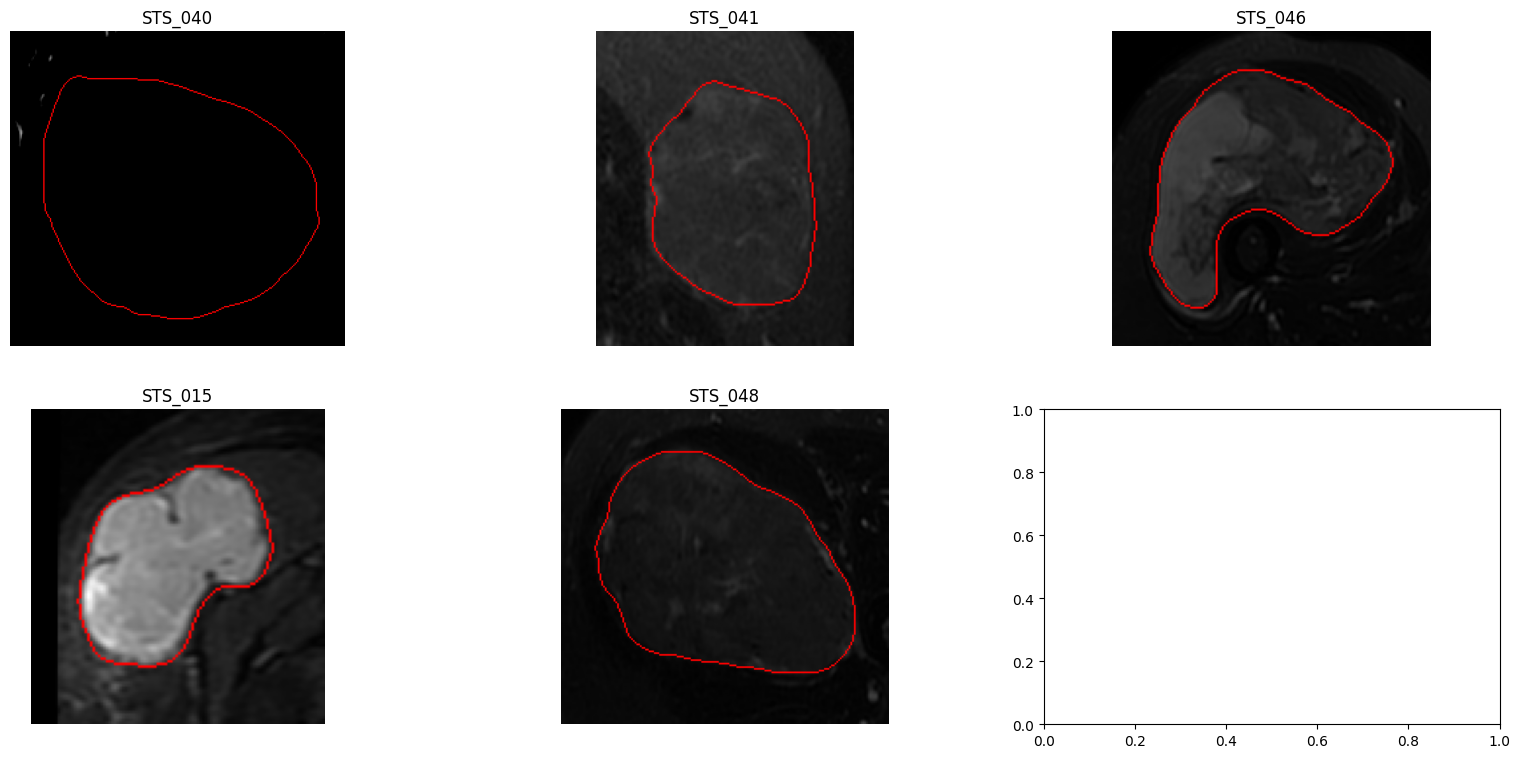

In [2]:
from src.dataset import ImageDataset
import logging

logging.getLogger().setLevel(logging.ERROR)

image_dataset = ImageDataset(
    paths_df,
    ID_colname='ID',
    root_dir=root_dir
)

image_dataset.plot_examples(n=5, window=None)

In [3]:
from src.feature_extraction import FeatureExtractor

extractor = FeatureExtractor(image_dataset, extraction_params='./conf/radiomic_params/mr_default.yml', n_jobs=-1)

feature_df = extractor.run()

QUEUEING TASKS | : 0it [00:00, ?it/s]

PROCESSING TASKS | :   0%|          | 0/51 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/51 [00:00<?, ?it/s]

2023/06/26 20:00:08 INFO mlflow.tracking.fluent: Experiment with name 'feature_extraction' does not exist. Creating a new experiment.


In [6]:
import pandas as pd
label_df = pd.read_csv('example_data/INFOclinical_STS.csv', encoding='cp1252')
label_df.sample(5)

,Patient ID,Age,Sex,Histological type,MSKCC type,Site of primary STS,Grade,Time – diagnosis to MRI scan (days),Time – MRI scan to PET scan (days),Treatment,"Outcome (recurrence, mets)",Time – diagnosis to outcome (days),"Status (NED, AWD, D)",Time – diagnosis to last follow-up (days)
5,STS_006,64,Male,extraskeletal osteosarcoma,Extraskeletal bone sarcoma,right thigh,High,-5,16,Radiotherapy + Surgery + Chemotherapy,Mets – lungs,198,AWD,592
15,STS_016,75,Female,spindle cell suggestive of pleomorphic liposar...,Liposarcoma,left thigh,Intermediate,-33,7,Radiotherapy + Surgery,--,--,NED,760
10,STS_011,56,Female,malignant solitary fibrous tumor,Other,right thigh,Intermediate,3,33,Radiotherapy + Surgery,--,--,NED,637
39,STS_040,57,Female,epithelioid sarcoma with vascular differentiation,Other,right buttock,NaN,-16,6,Radiotherapy + Surgery + Chemotherapy,Mets – lungs,73,D,131
46,STS_047,62,Female,liposarcoma,Liposarcoma,right thigh,NaN,-19,20,Radiotherapy + Surgery,--,--,NED,2121


In [28]:
from autorad.data import FeatureDataset
import numpy as np

merged_feature_df = feature_df.merge(label_df,
                                     left_on="ID", right_on="Patient ID", how="left")
merged_feature_df = merged_feature_df[merged_feature_df['Grade'].notna()]

merged_feature_df['Grade'] = merged_feature_df['Grade'].map({v:k for k, v in enumerate(merged_feature_df['Grade'].unique())})

feature_dataset = FeatureDataset(merged_feature_df,
                                 target="Grade",
                                 ID_colname="ID")


In [34]:
merged_feature_df.to_csv('./outputs/extracted_features.csv')

In [29]:
feature_dataset.split(method='train_val_test', save_path='outputs/splits.yml')

{'split_type': 'stratified split: 60% train + 20% validation + 20% test',
 'train': ['STS_012',
  'STS_027',
  'STS_034',
  'STS_015',
  'STS_008',
  'STS_030',
  'STS_043',
  'STS_050',
  'STS_014',
  'STS_041',
  'STS_001',
  'STS_007',
  'STS_019',
  'STS_021',
  'STS_046',
  'STS_036',
  'STS_029',
  'STS_038',
  'STS_025',
  'STS_011',
  'STS_024',
  'STS_010',
  'STS_037',
  'STS_023',
  'STS_009',
  'STS_032',
  'STS_045',
  'STS_031'],
 'val': ['STS_018',
  'STS_002',
  'STS_039',
  'STS_028',
  'STS_044',
  'STS_017',
  'STS_048',
  'STS_016',
  'STS_020',
  'STS_006'],
 'test': ['STS_042',
  'STS_013',
  'STS_004',
  'STS_005',
  'STS_003',
  'STS_033',
  'STS_049',
  'STS_022',
  'STS_035',
  'STS_026'],
 'split_on': 'ID'}

In [32]:
from autorad.models import MLClassifier

models = MLClassifier.initialize_default_sklearn_models()

print(models)

TypeError: 'NoneType' object is not callable

In [ ]:
import numpy as np
a = np.array(0, 1, 0, 1, 0, 0)

In [ ]:
import warnings
import pandas as pd
import os
import shutil

# for copying meningioma data from the original folder structure to one suitable with autorad

from multiprocessing import Pool


def process_patient(patient_info):
    patient_src, dest_patient_folder = patient_info
    expected_files = {'ADC.nii.gz', 'flair.nii.gz', 't1.nii.gz', 't1ce.nii.gz', 't2.nii.gz', 'mask.nii.gz'}
    found_files = set()
    for file in os.listdir(patient_src):
        if file.endswith('.nii') or file.endswith('.gz'):
            if 'ADC' in file:
                new_filename = 'ADC.nii'
            elif 'flair' in file:
                new_filename = 'flair.nii.gz'
            elif 't1ce' in file:
                new_filename = 't1ce.nii.gz'
            elif 't1' in file:
                new_filename = 't1.nii.gz'
            elif 't2' in file:
                new_filename = 't2.nii.gz'
            elif '_1.nii' in file or '_2.nii' in file or '_3.nii' in file:
                new_filename = 'mask.nii.gz'
            else:
                warnings.warn(f"Unexpected file {file} in patient folder {patient_src}")
                continue

            src_file_path = os.path.join(patient_src, file)
            dest_file_path = os.path.join(dest_patient_folder, new_filename)
            shutil.copy(src_file_path, dest_file_path)
            print(f"Copied file {src_file_path} to {dest_file_path}")

            found_files.add(new_filename)

    if expected_files != found_files:
        missing_files = expected_files - found_files
        warnings.warn(f"Missing files {missing_files} in patient folder {patient_src}")

    return dest_patient_folder


def copy_patient_data(src_dir, dest_dir, n_cpu=2):
    """
    Copies patient data from the source directory to the destination directory
    while maintaining an ascending pattern of integer-based patient IDs. The function
    creates a mapping of patient IDs, grades, and their original data paths,
    and saves the mapping to a CSV file. It also renames the files as per the required format.

    Parameters:
        src_dir (str): The path to the source directory containing patient data organized by grades.
        dest_dir (str): The path to the destination directory where the copied patient data will be stored.

    Returns:
        None: The function performs the copy operation, file renaming, and saves the mapping to a CSV file.

    Raises:
        FileNotFoundError: If any of the expected files are missing.
        ValueError: If there are additional files that don't match the pattern.
    """
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)
    patient_data = []
    patient_info_list = []
    for grade_folder in os.listdir(src_dir):
        grade_path = os.path.join(src_dir, grade_folder)
        if os.path.isdir(grade_path):
            for patient_folder in os.listdir(grade_path):
                patient_src = os.path.join(grade_path, patient_folder)
                if os.path.isdir(patient_src):
                    dest_patient_id = len(os.listdir(dest_dir)) + 1
                    dest_patient_folder = os.path.join(dest_dir, f"ID_{dest_patient_id}")
                    os.makedirs(dest_patient_folder, exist_ok=True)
                    patient_info_list.append((patient_src, dest_patient_folder))
                    grade = 1 if grade_folder == 'Grade1Data' else 2
                    patient_data.append((f"ID_{dest_patient_id}", grade, patient_src))

    # Process patient data in parallel using multiprocessing
    with Pool(n_cpu) as pool:
        dest_patient_folders = pool.map(process_patient, patient_info_list)

    # Create a pandas DataFrame from the patient_data list
    df = pd.DataFrame(patient_data, columns=["Patient_ID", "Grade", "Original_Data_Path"])

    # Save the DataFrame to a CSV file
    df.to_csv("patient_grade_mapping.csv", index=False)


copy_patient_data('./data/meningioma', './data/meningioma_data')